In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
from sklearn.datasets import load_boston

In [5]:
import seaborn as sns

In [6]:
sns.set()

In [7]:
sns.set(rc={'figure.figsize':(12,8)})

## 輸入資料

In [8]:
boston_dataset = load_boston()

In [9]:
boston = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)

In [10]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
boston['MEDV'] = boston_dataset.target

In [12]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [45]:
x = np.linspace(0,8,250)
y = 1.2*x+0.8+0.3*np.random.randn(250)

In [46]:
x = x.reshape(250,1)

## 一開始的資料

In [47]:
X = boston.loc[:, "CRIM":"LSTAT"].values
Y = boston.MEDV

In [48]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=0) 

In [49]:
len(x_test)

127

In [50]:
model = LinearRegression()

In [51]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
y_predict = model.predict(x_test)

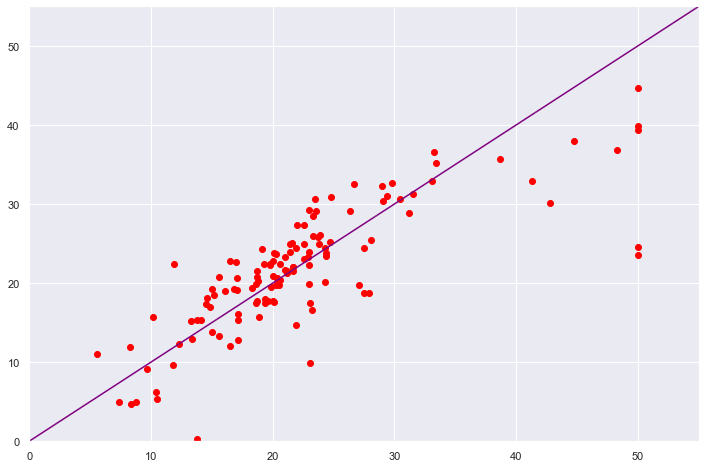

In [53]:
plt.scatter(y_test,y_predict,c='red')
plt.xlim(0,55)
plt.ylim(0,55)
plt.plot([0,55],[0,55],'purple')

## 只選擇 NOX 到 LSTAT 來預測

In [54]:
X1 = boston.loc[:, "NOX":"LSTAT"].values
Y1 = boston.MEDV

In [55]:
x1_train,x1_test,y1_train,y1_test = train_test_split(X1,Y1,test_size=0.25,random_state=0) 

In [56]:
model = LinearRegression()

In [57]:
model.fit(x1_train,y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
y1_predict = model.predict(x1_test)

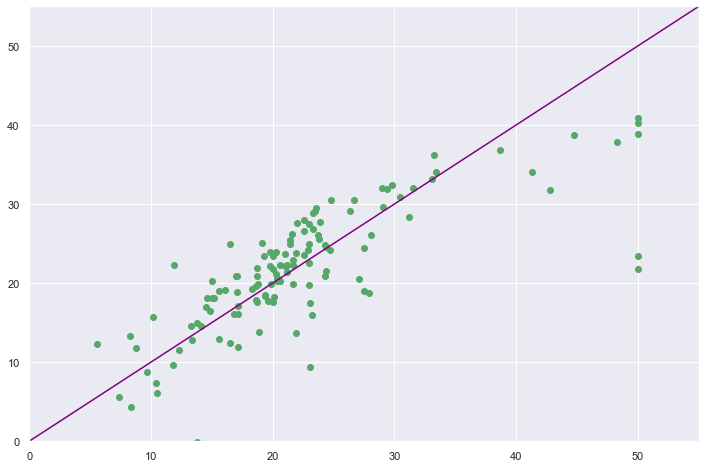

In [59]:
plt.scatter(y1_test,y1_predict,c='g')
plt.xlim(0,55)
plt.ylim(0,55)
plt.plot([0,55],[0,55],'purple')

## 只選擇 CRIM 到 RAD 來預測

In [60]:
X2 = boston.loc[:, "CRIM":"RAD"].values
Y2 = boston.MEDV

In [61]:
x2_train,x2_test,y2_train,y2_test = train_test_split(X2,Y2,test_size=0.25,random_state=0) 

In [62]:
model = LinearRegression()

In [63]:
model.fit(x2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
y2_predict = model.predict(x2_test)

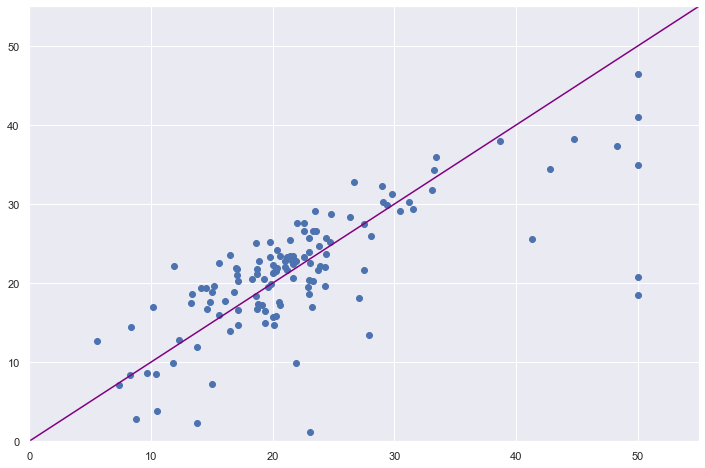

In [65]:
plt.scatter(y2_test,y2_predict,c='b')
plt.xlim(0,55)
plt.ylim(0,55)
plt.plot([0,55],[0,55],'purple')

## 比較兩個取法的差異(紅色為對照組,綠色.藍色為比較組)

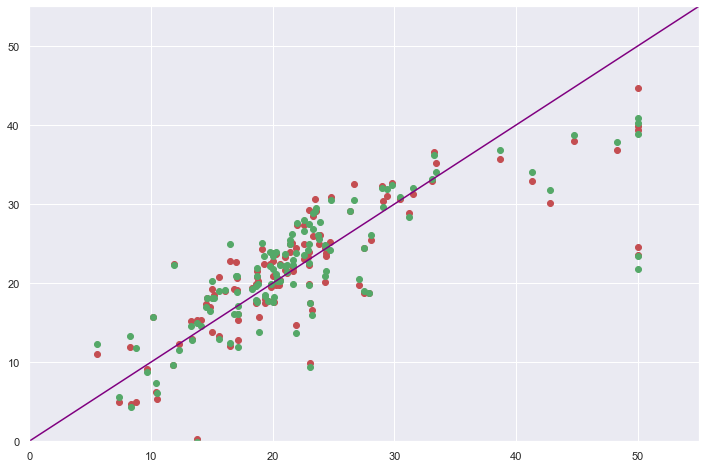

In [66]:
plt.scatter(y_test,y_predict,c='r')
plt.scatter(y1_test,y1_predict,c='g')
plt.xlim(0,55)
plt.ylim(0,55)
plt.plot([0,55],[0,55],'purple')

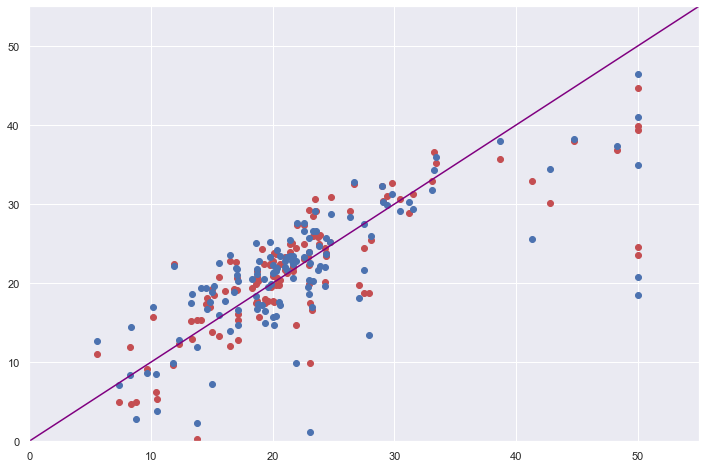

In [67]:
plt.scatter(y_test,y_predict,c='r')
plt.scatter(y2_test,y2_predict,c='b')
plt.xlim(0,55)
plt.ylim(0,55)
plt.plot([0,55],[0,55],'purple')